In [6]:
import numpy as np
import pandas as pd
df=pd.read_csv("tlc.csv")
df.head()


C:\Users\Eric\AppData\Local\Temp\ipykernel_30852\2451491261.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("tlc.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [7]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ks_2samp

# Load dataset (assuming it's in CSV format)
df = pd.read_csv("tlc.csv")

# Convert datetime columns to proper format
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['hour'] = df['lpep_pickup_datetime'].dt.hour  # Extract hour for peak analysis
df['day'] = df['lpep_pickup_datetime'].dt.dayofweek  # Extract day of the week

C:\Users\Eric\AppData\Local\Temp\ipykernel_30852\3543678226.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("tlc.csv")


In [17]:
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['PULocationID', 'trip_count']

# Display top locations
print(pickup_counts.head(10))

   PULocationID  trip_count
0            74       13257
1            75        9109
2            41        4058
3           166        3879
4            95        3839
5            82        2927
6            43        2868
7            97        2195
8             7        1965
9           244        1804


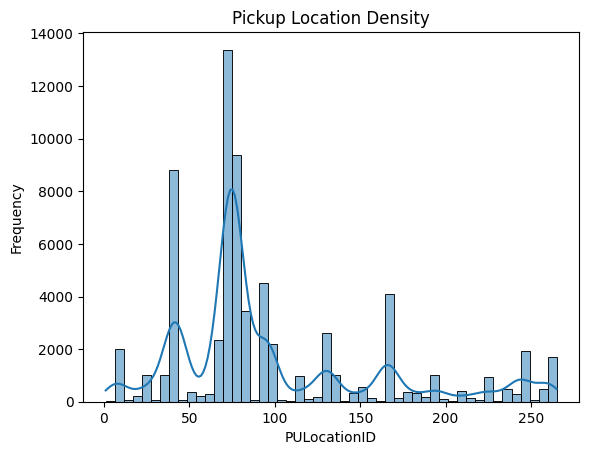

In [18]:
sns.histplot(df['PULocationID'], bins=50, kde=True)
plt.title('Pickup Location Density')
plt.xlabel('PULocationID')
plt.ylabel('Frequency')
plt.show()

In [19]:
hourly_trips = df['hour'].value_counts().reset_index()
hourly_trips.columns = ['hour', 'trip_count']

print(hourly_trips.sort_values('hour'))

    hour  trip_count
17     0        1129
19     1         891
20     2         659
21     3         598
22     4         451
23     5         431
18     6         998
13     7        2646
12     8        3219
10     9        3520
9     10        3633
8     11        3735
7     12        3806
6     13        4012
4     14        4415
3     15        5105
2     16        5216
1     17        5223
0     18        5236
5     19        4223
11    20        3234
14    21        2415
15    22        1912
16    23        1504


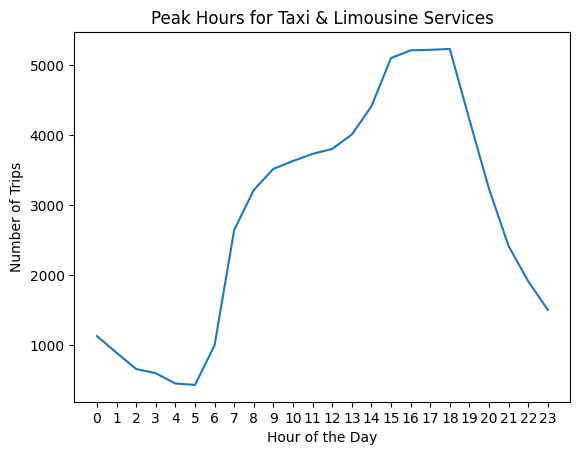

In [20]:
sns.lineplot(x=hourly_trips['hour'], y=hourly_trips['trip_count'])
plt.title('Peak Hours for Taxi & Limousine Services')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.show()

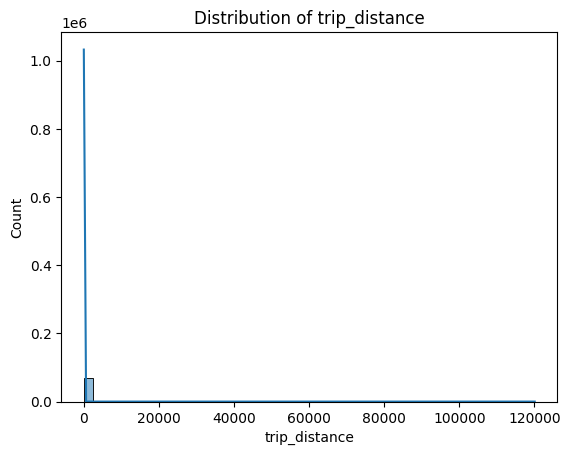

c:\Users\Eric\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68211.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for trip_distance: p-value = 0.0000


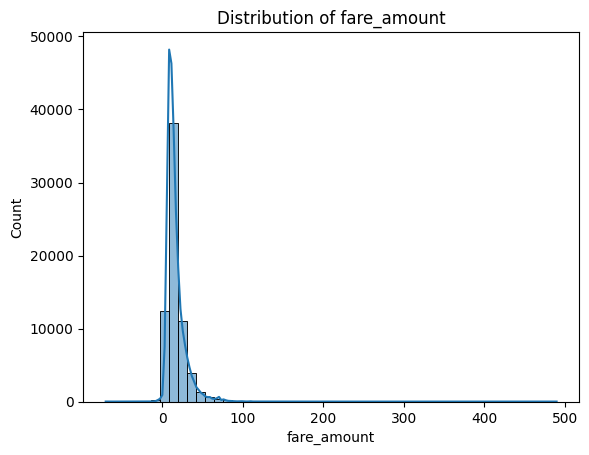

c:\Users\Eric\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68211.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test for fare_amount: p-value = 0.0000


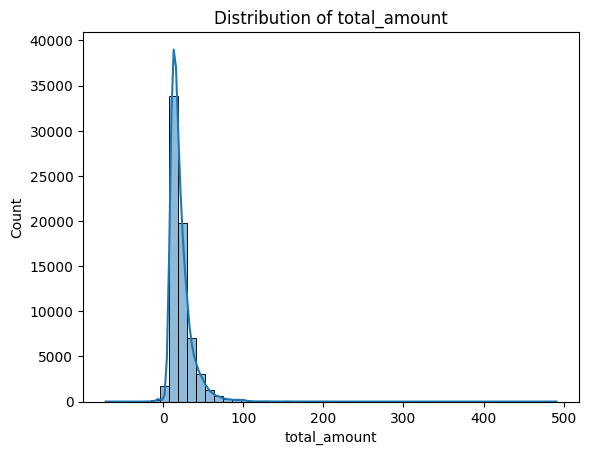

Shapiro-Wilk Test for total_amount: p-value = 0.0000


c:\Users\Eric\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68211.
  res = hypotest_fun_out(*samples, **kwds)


In [21]:
numeric_columns = ['trip_distance', 'fare_amount', 'total_amount']

for col in numeric_columns:
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    stat, p = shapiro(df[col])  # Shapiro-Wilk Test
    print(f'Shapiro-Wilk Test for {col}: p-value = {p:.4f}')

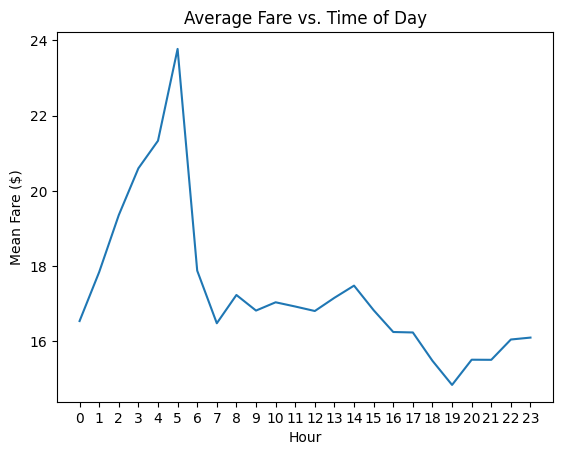

In [22]:
hourly_fare = df.groupby('hour')['fare_amount'].mean().reset_index()

sns.lineplot(x=hourly_fare['hour'], y=hourly_fare['fare_amount'])
plt.title('Average Fare vs. Time of Day')
plt.xlabel('Hour')
plt.ylabel('Mean Fare ($)')
plt.xticks(range(0, 24))
plt.show()

<h1>Hypothesis 0 & alternative</h1>

- Null Hypothesis (H₀): Taxi and limousine pickups and drop-offs are uniformly distributed across locations and time periods.
- Alternative Hypothesis (H₁): There are significant differences in pickup/drop-off frequency across locations and peak hours


In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("tlc.csv")

# Convert pickup datetime column to proper format
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day'] = df['lpep_pickup_datetime'].dt.dayofweek

C:\Users\Eric\AppData\Local\Temp\ipykernel_30852\3781917514.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("tlc.csv")


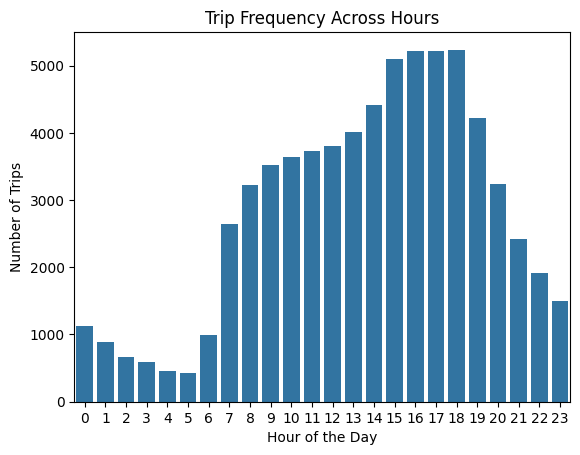

In [26]:
# Count trips per hour
hourly_counts = df['hour'].value_counts().sort_index()

# Plot peak hour distribution
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Trip Frequency Across Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

In [31]:
expected_freq = np.full(location_counts.shape, location_counts.sum() / len(location_counts))  # Uniform expected counts

# Perform Chi-Square Goodness-of-Fit Test
chi2_stat, p_value = stats.chisquare(location_counts, expected_freq)

print(f'Chi-Square Test Statistic: {chi2_stat:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print("Reject H₀: Pickup locations show significant variations.")
else:
    print("Fail to reject H₀: Pickup locations are uniformly distributed.")

Chi-Square Test Statistic: 1092051.6527
P-value: 0.0000
Reject H₀: Pickup locations show significant variations.


In [29]:
# Define peak hours (e.g., 7-9 AM, 5-7 PM)
peak_hours = df[df['hour'].isin([7, 8, 9, 17, 18, 19])]
non_peak_hours = df[~df['hour'].isin([7, 8, 9, 17, 18, 19])]

# T-Test for fare amounts
t_stat, p_value = stats.ttest_ind(peak_hours['fare_amount'], non_peak_hours['fare_amount'])

print(f'T-Test Statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print("Reject H₀: Fare amounts differ significantly between peak and non-peak hours.")
else:
    print("Fail to reject H₀: Fare amounts are similar across all hours.")

T-Test Statistic: -7.5818
P-value: 0.0000
Reject H₀: Fare amounts differ significantly between peak and non-peak hours.


<h4>Objectives & Questions Of Taxi &Limousine Commission</h4>

1.   List item
2.   List item



In [ ]:
df.isnull().sum()

,0
VendorID,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,4324
RatecodeID,4324
PULocationID,0
DOLocationID,0
passenger_count,4324
trip_distance,0
fare_amount,0


In [ ]:
df[df.isnull().any(axis=1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [ ]:
df_cleaned=df.dropna()
df.dropna(axis=1)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,166,143,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,24,43,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,179,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,41,238,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,41,74,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,49,62,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,10,205,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,66,37,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,225,189,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18


In [ ]:
# Show Columns With Missing Values
df.columns[df.isnull().any()]

Index(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
store_and_fwd_flag,4324
RatecodeID,4324
passenger_count,4324
ehail_fee,68211
payment_type,4324
trip_type,4334
congestion_surcharge,4324


In [ ]:
# percentage of missing values in columns of missing values
df.isnull().mean()[df.isnull().sum()>0]*100

,0
store_and_fwd_flag,6.339154
RatecodeID,6.339154
passenger_count,6.339154
ehail_fee,100.000000
payment_type,6.339154
trip_type,6.353814
congestion_surcharge,6.339154


In [4]:
# Fill Missing Values Of Columns With Mean For Int / float And fill most frequent value for string dtype
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            df[column].fillna(df[column].mean(), inplace=True)  # use median() if needed
        elif df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\Eric\AppData\Local\Temp\ipykernel_29468\132539976.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\Eric\AppData\Local\Temp\ipykernel_29468\132539976.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [5]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge         0
dtype: int64

Replacing Nan Value of ehail_fee to 0

In [6]:
df.isnull().sum()[df.isnull().sum()>0]

ehail_fee    68211
dtype: int64

In [7]:
df["ehail_fee"].fillna(0,inplace=True)
# Replace Nan Value To 0

C:\Users\Eric\AppData\Local\Temp\ipykernel_29468\3366504430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ehail_fee"].fillna(0,inplace=True)


In [29]:
df.isnull().sum()[df.isnull().sum()>0]
# menunjukkan bahwa semua column sudah terisi Dan tidak terdapat missing value

ehail_fee    999
dtype: int64

In [30]:

df["ehail_fee"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
994   NaN
995   NaN
996   NaN
997   NaN
998   NaN
Name: ehail_fee, Length: 999, dtype: float64

<h4>Convert Data types of datetime</h4>

In [10]:
#  Convert datetime fields
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [11]:
df["lpep_pickup_datetime"]

0       2023-01-01 00:26:10
1       2023-01-01 00:51:03
2       2023-01-01 00:35:12
3       2023-01-01 00:13:14
4       2023-01-01 00:33:04
                ...        
68206   2023-01-31 22:29:00
68207   2023-01-31 22:40:00
68208   2023-01-31 23:46:00
68209   2023-01-31 23:01:00
68210   2023-01-31 23:51:00
Name: lpep_pickup_datetime, Length: 68211, dtype: datetime64[ns]

Create Trip Duration In Minutes

In [12]:
df['trip_duration_min'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 6

In [13]:
df["trip_duration_min"]

0        110.166667
1         67.666667
2         63.333333
3         58.166667
4         59.666667
            ...    
68206    130.000000
68207     80.000000
68208    160.000000
68209    180.000000
68210    160.000000
Name: trip_duration_min, Length: 68211, dtype: float64

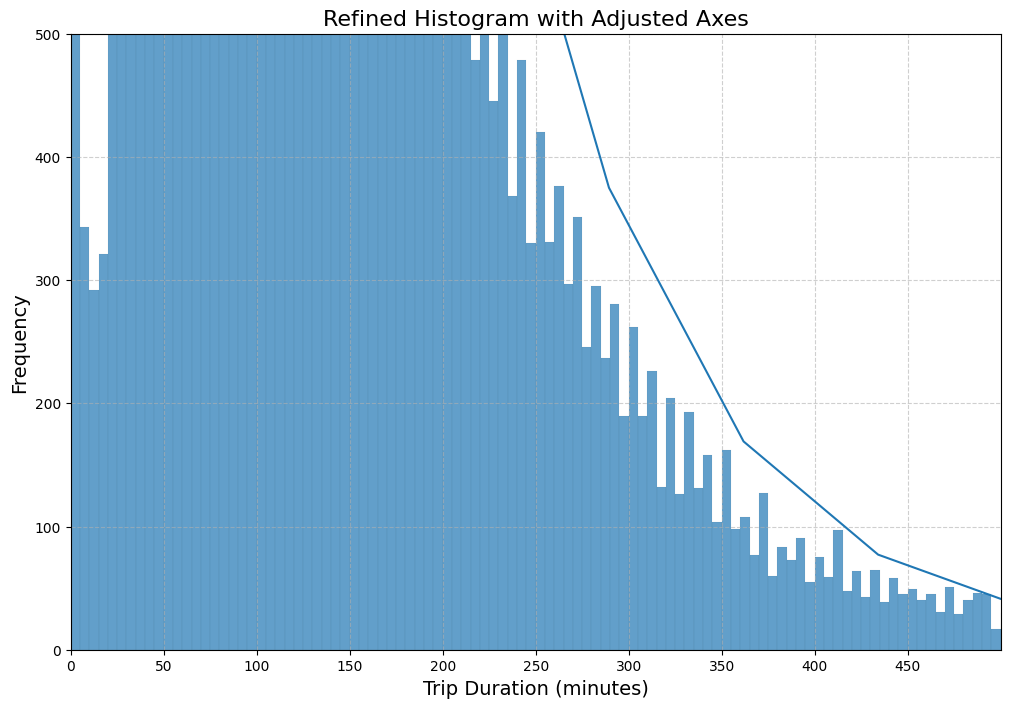

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define better bins
bins = np.arange(0, df["trip_duration_min"].max() + 5, 5)

# Create a larger, properly adjusted figure
plt.figure(figsize=(12, 8))
sns.histplot(df["trip_duration_min"], bins=bins, kde=True, edgecolor='black', alpha=0.7)

# Adjust axes to prevent overcrowding
plt.xlim(0, 500)  # Limit trip duration range
plt.xticks(np.arange(0, 500, 50))  # Keep x-axis labels manageable
plt.ylim(0, 500)  # Prevent the y-axis from overflowing

# Labels and grid for clarity
plt.xlabel("Trip Duration (minutes)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Refined Histogram with Adjusted Axes", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

objectives:
1. Find The Crowd Area Places To Taxi & Limousine To Stay At Ordinary Peak Hours
2. Find Best Hours To Stay At Some Area

In [14]:
# Extract hour and day from pickup timestamp
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day_name()


In [15]:
# 2. Identify Top Pickup Locations

pickup_counts = df['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Locations:")
print(pickup_counts)

Top 10 Pickup Locations:
PULocationID
74     13257
75      9109
41      4058
166     3879
95      3839
82      2927
43      2868
97      2195
7       1965
244     1804
Name: count, dtype: int64


In [16]:
# Group by location and hour
pickup_by_location_hour = df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')

# Find the hour with highest pickups per location
best_times = pickup_by_location_hour.loc[pickup_by_location_hour.groupby('PULocationID')['pickup_count'].idxmax()]
best_times = best_times.sort_values(by='pickup_count', ascending=False)
print(best_times.head(10))  # Top 10 most active time/place combos


      PULocationID  pickup_hour  pickup_count
799             74            7          1163
833             75           17           932
398             41           15           381
930             82           18           367
1664           166           15           367
1081            95           15           330
445             43           17           325
1106            97           18           232
678             65           17           182
2609           260           18           165


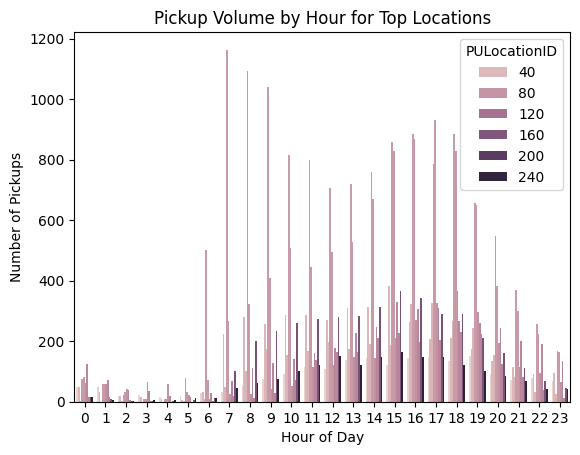

In [17]:

# 4. Visualize Top Pickup Zones Over Time

import seaborn as sns
import matplotlib.pyplot as plt

top_locations = pickup_counts.index.tolist()
df_top = df[df['PULocationID'].isin(top_locations)]

sns.countplot(data=df_top, x='pickup_hour', hue='PULocationID')
plt.title("Pickup Volume by Hour for Top Locations")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.legend(title='PULocationID')
plt.show()

Outliers removal processes

In [21]:
df['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60
df['hour'] = df['pickup_datetime'].dt.hour

df_clean = df[
    (df['trip_distance'] > 0) & (df['trip_distance'] < 100) &
    (df['fare_amount'] > 0) & (df['fare_amount'] < 500) &
    (df['trip_duration'] > 0) & (df['trip_duration'] < 180) &
    (df['passenger_count'] > 0) & (df['passenger_count'] <= 6)
]


In [ ]:
# Calculate Q1, Q3, and IQR for trip_distance
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
df_clean_iqr = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

print("Original Count:", len(df))
print("After IQR Outlier Removal:", len(df_clean_iqr))

Original Count: 68211
After IQR Outlier Removal: 62437


In [ ]:
import numpy as np

# Calculate mean and standard deviation for fare_amount
mean_fare = df['fare_amount'].mean()
std_fare = df['fare_amount'].std()

# Compute z-score
df['fare_zscore'] = (df['fare_amount'] - mean_fare) / std_fare

# Set threshold (commonly 3 standard deviations)
threshold = 3

# Filter data based on z-score
df_clean_z = df[np.abs(df['fare_zscore']) < threshold]

print("Original Count:", len(df))
print("After Z-score Outlier Removal:", len(df_clean_z))

Original Count: 68211
After Z-score Outlier Removal: 67148


In [ ]:
# Filter based on domain thresholds
df_clean_domain = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 50) &
                     (df['trip_duration_min'] > 1) & (df['trip_duration_min'] < 120) &
                     (df['fare_amount'] > 2.5) & (df['fare_amount'] < 200)]
print("After Domain-Specific Outlier Removal:", len(df_clean_domain))

After Domain-Specific Outlier Removal: 34037


In [ ]:
# First remove using IQR on trip_distance
df_intermediate = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

# Then apply domain-specific rules on the intermediate dataset
df_clean_combined = df_intermediate[(df_intermediate['trip_duration_min'] > 1) &
                                    (df_intermediate['trip_duration_min'] < 120) &
                                    (df_intermediate['fare_amount'] > 2.5) &
                                    (df_intermediate['fare_amount'] < 200)]
print("After Combined Outlier Removal:", len(df_clean_combined))

After Combined Outlier Removal: 35157


<h4> Pickup Time Outliers </h4>


In [ ]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df = df[(df['pickup_hour'] >= 0) & (df['pickup_hour'] <= 23)]

<h4> Trip Distance Filters </h4>

In [ ]:
df = df[(df['trip_distance'] > 0.1) & (df['trip_distance'] < 50)]

<h4> Optional Fare Filter </h4>

In [ ]:
df = df[(df['trip_distance'] > 0.1) & (df['trip_distance'] < 50)]

Analyze Peak Hours per Location

In [ ]:
grouped = df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
peak_hours = grouped.loc[grouped.groupby('PULocationID')['pickup_count'].idxmax()]
peak_hours = peak_hours.sort_values(by='pickup_count', ascending=False)
print(peak_hours)

      PULocationID  pickup_hour  pickup_count
679             74            7          1123
713             75           17           922
332             41           15           369
1413           166           15           364
794             82           18           357
...            ...          ...           ...
2103           251            3             1
2104           252            2             1
2178           259            5             1
2205           261            2             1
2206           262            7             1

[198 rows x 3 columns]


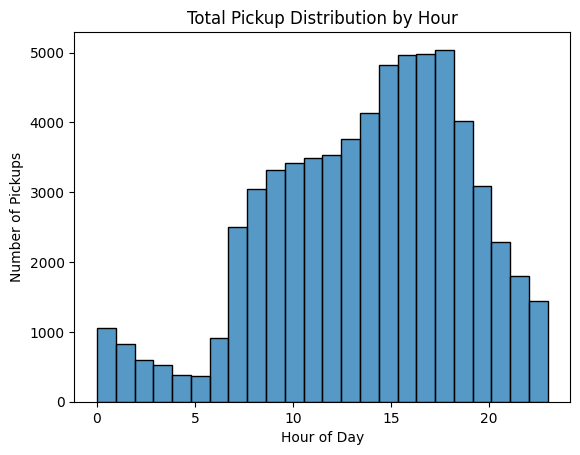

PULocationID
74     12955
75      8909
41      3941
166     3836
95      3669
43      2846
82      2828
97      2128
244     1768
7       1763
Name: count, dtype: int64


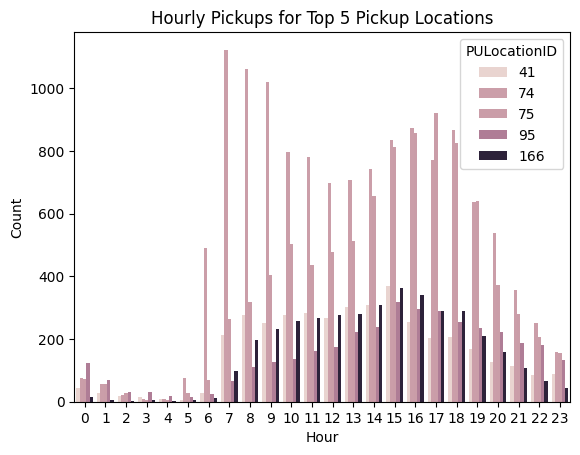

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day_name()

# Hourly pickup distribution
sns.histplot(df['pickup_hour'], bins=24, kde=False)
plt.title("Total Pickup Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.show()

top_pu = df['PULocationID'].value_counts().head(10)
print(top_pu)
# Top 5 pickup locations hourly trend
top5_ids = top_pu.index[:5].tolist()
df_top5 = df[df['PULocationID'].isin(top5_ids)]

sns.countplot(data=df_top5, x='pickup_hour', hue='PULocationID')
plt.title("Hourly Pickups for Top 5 Pickup Locations")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title='PULocationID')
plt.show()

<h1> Feature Selection </h1>


In [ ]:
selected_columns = [
    'lpep_pickup_datetime',  # Time info
    'PULocationID',          # Pickup zone
    'trip_distance',         # To filter invalid trips
    'fare_amount',           # To filter unrealistic fares
    'passenger_count'        # Optional - understand load
]
df = df[selected_columns].copy()

<h3>Summary of analysis </h3>

Descriptive statistics for pickup hours:
count    999.000000
mean      10.100100
std        5.952214
min        0.000000
25%        4.000000
50%       12.000000
75%       15.000000
max       19.000000
Name: pickup_hour, dtype: float64


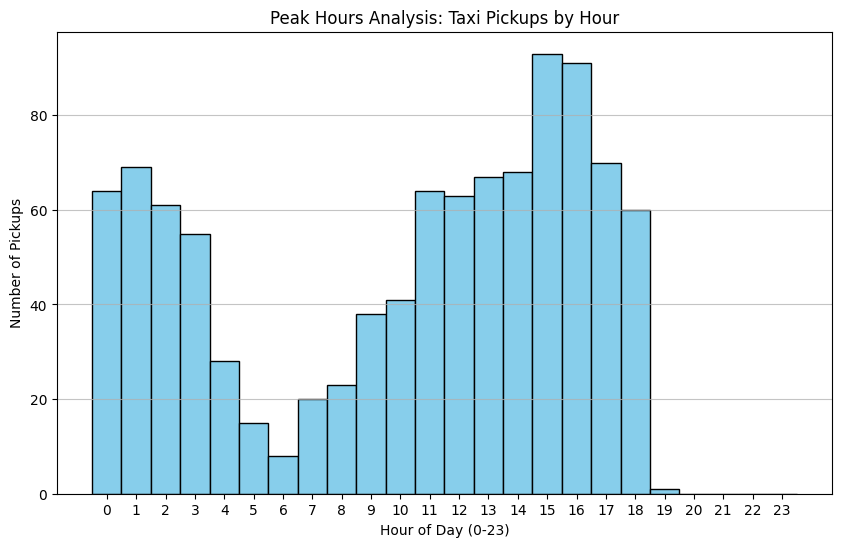


Top 10 most frequent pickup locations (by PULocationID):
PULocationID
3      1
7     46
14     2
17     3
20     1
22     1
24    10
25     7
28     1
29     1
Name: count, dtype: int64


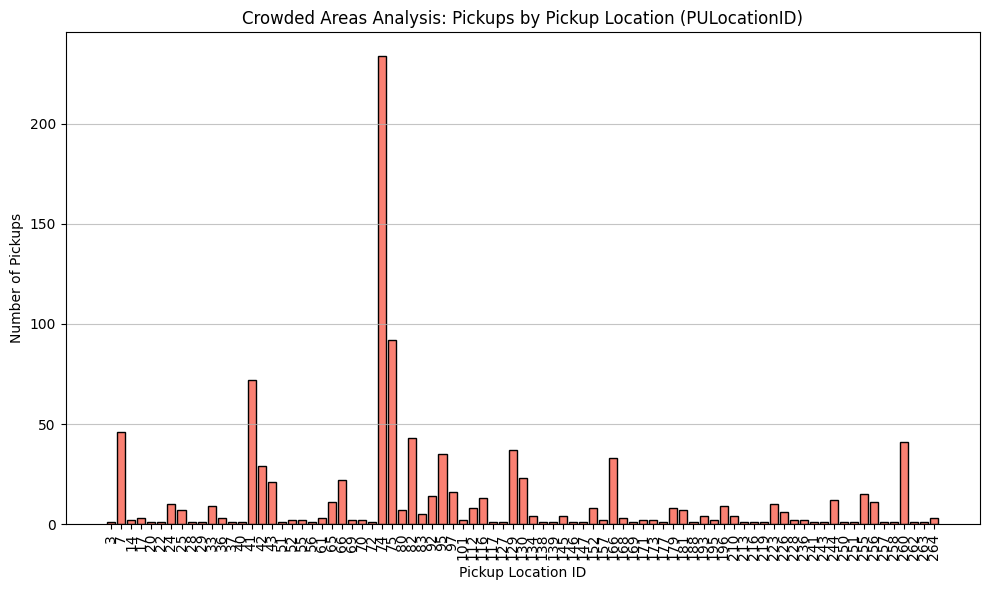

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("tlc--.xlsx", sheet_name="Sheet1")


df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"], format="%m/%d/%Y %H:%M:%S", errors='coerce')


df.dropna(subset=["lpep_pickup_datetime"], inplace=True)


df["pickup_hour"] = df["lpep_pickup_datetime"].dt.hour


print("Descriptive statistics for pickup hours:")
print(df["pickup_hour"].describe())


plt.figure(figsize=(10, 6))
plt.hist(df["pickup_hour"], bins=range(0, 25), align='left', edgecolor='black', color='skyblue')
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Pickups")
plt.title("Peak Hours Analysis: Taxi Pickups by Hour")
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()


location_counts = df["PULocationID"].value_counts().sort_index()

print("\nTop 10 most frequent pickup locations (by PULocationID):")
print(location_counts.head(10))


plt.figure(figsize=(10, 6))
plt.bar(location_counts.index.astype(str), location_counts.values, color='salmon', edgecolor='black')
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Pickups")
plt.title("Crowded Areas Analysis: Pickups by Pickup Location (PULocationID)")
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()  
plt.show()

<h1>Hypothesis</h1>

<h4>H0: lokasi tidak berpengaruh terhadap peak hours</h4>
<h4>H1: peak hours berpengaruh terhadap sebuah lokasi yang ramai</h4>

<h4>Chi Square Test </h4>

Pivot table for top 10 PULocationIDs by peak ride counts:
    PULocationID  non_peak_count  peak_count
27            74           142.0        92.0
28            75            65.0        27.0
14            41            54.0        18.0
33            95            20.0        15.0
30            82            29.0        14.0
1              7            33.0        13.0
41           130            12.0        11.0
50           166            22.0        11.0
16            43            11.0        10.0
15            42            21.0         8.0

Chi-square test result:
Chi-square statistic: 12.24393291372439
p-value: 0.19990427544846992

Poisson Regression Summary:


c:\Users\Eric\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:             ride_count   No. Observations:                  115
Model:                            GLM   Df Residuals:                        0
Model Family:                 Poisson   Df Model:                          114
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.59
Date:                Fri, 23 May 2025   Deviance:                  -1.2434e-14
Time:                        00:36:48   Pearson chi2:                 6.24e-26
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

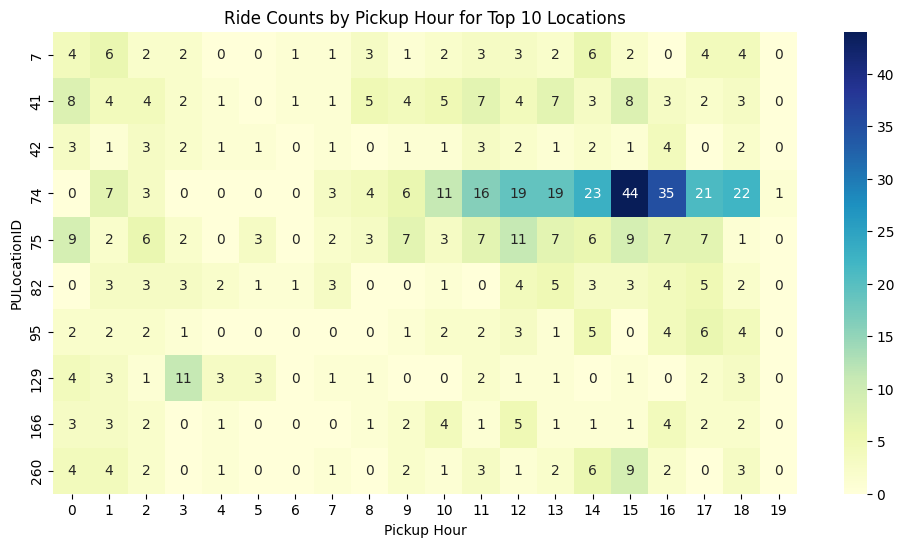

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("tlc--.xlsx", sheet_name="Sheet1")

df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"], format="%m/%d/%Y %H:%M:%S")
df["PickupHour"] = df["lpep_pickup_datetime"].dt.hour

df["is_peak"] = df["PickupHour"].apply(lambda x: 1 if ((7 <= x <= 9) or (16 <= x <= 19)) else 0)


group = df.groupby(["PULocationID", "is_peak"]).size().reset_index(name="ride_count")

pivot = group.pivot(index="PULocationID", columns="is_peak", values="ride_count").fillna(0).reset_index()
pivot.columns = ["PULocationID", "non_peak_count", "peak_count"]

top_locations = pivot.nlargest(10, "peak_count")
print("Pivot table for top 10 PULocationIDs by peak ride counts:")
print(top_locations)


contingency = top_locations[["non_peak_count", "peak_count"]].values
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-square test result:")
print("Chi-square statistic:", chi2)
print("p-value:", p)

poisson_model = smf.glm(formula="ride_count ~ C(PULocationID) * C(is_peak)",
                        data=group,
                        family=sm.families.Poisson()).fit()
print("\nPoisson Regression Summary:")
print(poisson_model.summary())

top_locs = df["PULocationID"].value_counts().nlargest(10).index
filtered = df[df["PULocationID"].isin(top_locs)]
heat_data = filtered.groupby(["PULocationID", "PickupHour"]).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Ride Counts by Pickup Hour for Top 10 Locations")
plt.xlabel("Pickup Hour")
plt.ylabel("PULocationID")
plt.show()